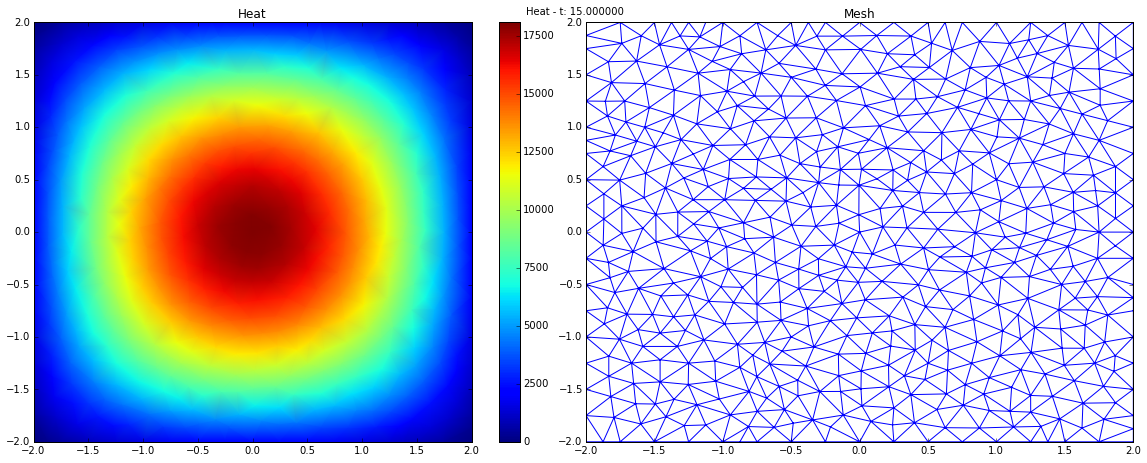

In [ ]:
%matplotlib inline
%run /home/fenics/fenics-matplotlib.py
from dolfin import *; from mshr import *; from IPython.display import display, clear_output; import time
import logging; logging.getLogger('FFC').setLevel(logging.WARNING)

XMIN, XMAX = -2., 2.; 
YMIN, YMAX = -2., 2.; 
G = [XMIN, XMAX, YMIN, YMAX];
mresolution = 20;
mesh = generate_mesh(Rectangle(Point(G[0], G[2]), Point(G[1], G[3])), mresolution)
degree = 1;
V = FunctionSpace(mesh, "CG", degree);

def plot_compact(u, t, stepcounter): # Compact plot utility function
    if stepcounter % 5 == 0:
        uEuclidnorm = project(u, V); ax.cla(); fig = plt.gcf(); fig.set_size_inches(16, 6.5)
        plt.subplot(1, 2, 1); mplot_function(uEuclidnorm); plt.title("Heat") # Plot norm of velocity
        if t == 0.: plt.colorbar(); plt.axis(G)
        plt.subplot(1, 2, 2);
        if t == 0.: plt.triplot(mesh2triang(mesh)); plt.title("Mesh") # Plot mesh
        plt.suptitle("Heat - t: %f" % (t)); plt.tight_layout(); clear_output(wait=True); display(pl)   

v = TestFunction(V); u = Function(V);
theta = 1.0 # 1.0-Implicit Euler, 0.5-Midpoint rule, 0-Explicit Euler
k = 0.5; 
t, T = 0., 20.;

k_coeff = 1
ue = Expression("exp(-(x[0]*x[0]+x[1]*x[1])/(4*a*t))/(4*pi*a*t)", a=k_coeff, t=1e-7, domain=mesh) 
u0 = ue;

def boundary(x, on_boundary):  # define the Dirichlet boundary
    return on_boundary

bc = DirichletBC(V, ue, boundary)

pl, ax = plt.subplots(); stepcounter = 0; timer0 = time.clock()

while t < T: # Time-stepping loop
    um = theta*u + (1.0-theta)*u0 # velocity u at midpoint of time interval
    r = (u - u0)/k*v*dx + k_coeff*inner(grad(um), grad(v))*dx
    solve(r==0, u, bc)  # Solve the Heat equation (one timestep)
    plot_compact(u, t, stepcounter) # Plot all quantities (see implementation above)
    t += k; u0 = project(u, V); # Shift to next timestep
    ue.t = t;
    stepcounter += 1 
print "elapsed CPU time: ", (time.clock() - timer0)  